<a href="https://colab.research.google.com/github/juliabui/csc408-411/blob/main/Project_01_Data_Exploration_and_Processing_of_the_Iris%20%23411.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Data Exploration and Processing of the Iris Dataset (or try your own dataset if you want)


Your name: *Enter your answer here*

## **Introduction**
This notebook is designed to guide you through a detailed exploration and processing of the Iris dataset for Project 1. You will analyze three specific features in depth, apply encoding techniques, explore data normalization, and examine feature correlations.

## Objective:
Conduct a comprehensive exploration and processing of the Iris dataset to understand key features and their relationships, applying various data preprocessing techniques.

##Instructions:

1. Data Exploration:
    * Explore and understand each variable in the Iris dataset.
    * Select 3 variables (features) and perform detailed analysis using histograms and box plots.
    * Write a detailed analysis for each selected variable, discussing its characteristics and any interesting findings.
2. Feature Encoding:
    * Discuss why one would choose one-hot encoding vs. ordinal encoding.
    * Identify which variables in the Iris dataset should be encoded in each way and justify your choices.
3. Normalization & Standardization:
    * Determine which features should be normalized or standardized.
    * Explain why these features were chosen for normalization or standardization.
4. Correlation Analysis:
    * Study the correlation of each feature using pair plots.
    * Select at least 3 plots from the pair plot analysis and explain why they are of interest.
5. Handling Special Cases in Data:
    * Consider how you would handle a categorical variable like zip code in the
    * context of housing data.
    * Discuss whether it should be treated as a numerical or categorical feature.
6. Reflection:
    * Write a reflection on what you have learned from this project.
    * Discuss at least 3 new insights or techniques you encountered and outline any challenges you still face.


# Import Necessary Libraries


In [ ]:
# Data handling & plots
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn: data, splitting, preprocessing, and pipelines
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # add MinMaxScaler if you will use it
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# Optional: set consistent plotting aesthetics
sns.set_theme(style="whitegrid", context="notebook")
plt.rcParams["figure.dpi"] = 120


# Load the Dataset

Iris is a preloaded Seaborn dataset that we can use to perform our first initial data exploration and processing.

It is about the flower, the iris, with three different species, *setosa*, *versicolor*, and *virginica* (categorical variables).

It includes other columns (features) as well, such as sepal length and width, and petal length and width in centimeters.

You can also view the dataset here: https://www.kaggle.com/datasets/abhishekbhamidipati/iris-dataset





In [ ]:
# Load the Iris dataset
data = sns.load_dataset('iris')
print(data.head())

data.species.unique()

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


array(['setosa', 'versicolor', 'virginica'], dtype=object)

###Quick Checks

We always do these just to make sure the data has loaded and to do some quick observations about what's going on with the data.

In [ ]:
print(data.shape)                 # Expect (150, 5) for Iris
print(data.isna().sum())          # Iris has no missing values; real data often does
print(data.describe(include="all"))  # See ranges, categories, odd values


(150, 5)
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
        sepal_length  sepal_width  petal_length  petal_width species
count     150.000000   150.000000    150.000000   150.000000     150
unique           NaN          NaN           NaN          NaN       3
top              NaN          NaN           NaN          NaN  setosa
freq             NaN          NaN           NaN          NaN      50
mean        5.843333     3.057333      3.758000     1.199333     NaN
std         0.828066     0.435866      1.765298     0.762238     NaN
min         4.300000     2.000000      1.000000     0.100000     NaN
25%         5.100000     2.800000      1.600000     0.300000     NaN
50%         5.800000     3.000000      4.350000     1.300000     NaN
75%         6.400000     3.300000      5.100000     1.800000     NaN
max         7.900000     4.400000      6.900000     2.500000     NaN


# Data Exploration





### **First, how to interpret histograms & boxplots (and why they matter)**

**Histograms**

* **What they show:** the shape of a single numeric feature—where values are concentrated and how they spread.

* **How to read them**

  * **Center**: where most bars are (roughly the mean/median zone).

  * **Spread**: how wide the occupied range is; broad = more variance.

  * **Skew**: long tail right = right-skewed; left tail = left-skewed.

  * **Modality**: one peak (unimodal), two (bimodal), many (multimodal).

  * **Gaps/Heaping**: empty bins or suspicious spikes (often data entry or rounding).

  * **Outliers**: extreme bars far from the main mass (confirm with boxplots).

* **Why important in processing**

  * **Feature scaling choice**: strong skew → consider log before StandardScaler; near-normal → StandardScaler is fine.

  * **Model choice:** multimodal distributions may hint at latent groups → consider adding a grouping variable or interaction terms.

  * **Anomaly handling:** tails/outliers may require capping.

* **Pro Tips**

  * Compare classes: overlay by hue or facet by category to see separation that pooled data hides (e.g., Iris petal length separates species clearly).

  * Use density (not count) when sample sizes differ across groups.


**Boxplots**

* **What they show:** a robust summary by groups; great for comparing distributions side-by-side.

* **How to read them**
  * **Median line:** central tendency (resistant to outliers).

  * **Box:** interquartile range (IQR = Q3 - Q1), the middle 50% of data.

  * **Whiskers:** extend to the most extreme points within 1.5 x IQR of the quartiles. (Remember the 1.5 IQR Rule from CSC 311? Beyond that are outliers.)

  * **Points beyond whiskers:** outliers (worth checking, are they errors or real data?).

  * **Box/whisker lengths:** longer = more variability.

  * **Between-group shifts:** higher/lower medians suggest real differences.

  * **Overlap:** lots of overlap --> weaker separation for that feature.

* **Why they are important in processing**

  * **Outlier policy:** identify candidates for capping or robust methods (L1 or L2, for example).

  * **Encoding decisions:**  if a numeric feature varies systematically by a category, consider interactions or stratified modeling.

  * **Normalization:** wide IQRs or very different scales across features favor scaling; heavy outliers favor RobustScaler (uses median/IQR).

* **Pro Tips**

  * **Add points:** overlay jitter/strip/swarm on your plots to reveal sample size and clusters. (This is optional, but research [swarmp and strip plots](https://www.geeksforgeeks.org/python/difference-between-stripplot-and-swarmplot-in-python/), and [jitter plots](https://datagy.io/seaborn-stripplot/)  in general for extra visualization power.  

  * **Many categories?** Consider [violin plots](https://www.geeksforgeeks.org/python/violinplot-using-seaborn-in-python/) (shape + box).

**When to use which**

* **Exploring a single feature:** Histogram first (shape & skew), then boxplot (robust center/spread).

* **Comparing groups:** Boxplots (fast comparison); supplement with faceted histograms to see shape differences.

* **Spotting separability for classification:** Overlay/faceted histograms by class; boxplots to confirm median shifts and IQR overlap.



##Analyze A Specific Feature
**Analyze at least 3 different features (here only one feature has been selected)**

You will do this for all three features you choose to explore. Decide what you'd like to investigate and construct histograms and boxplots to illustrate your exploration.


##Histograms

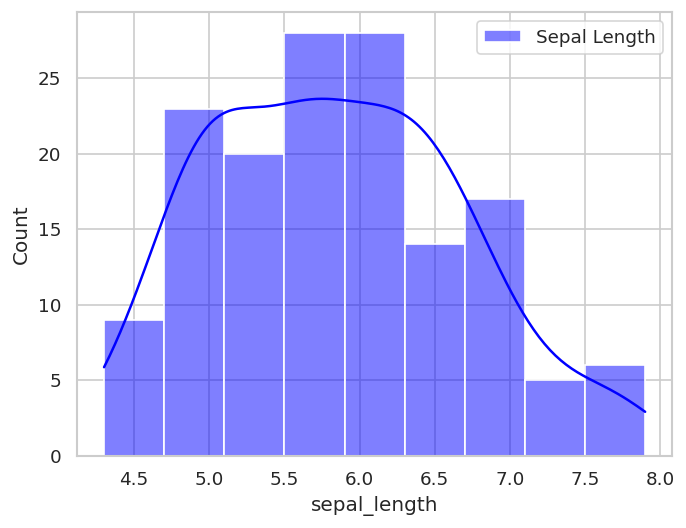

In [ ]:
# Histograms for selected feature
sns.histplot(data['sepal_length'], kde=True, color='blue', label='Sepal Length')
plt.legend()
plt.show()

##Boxplots

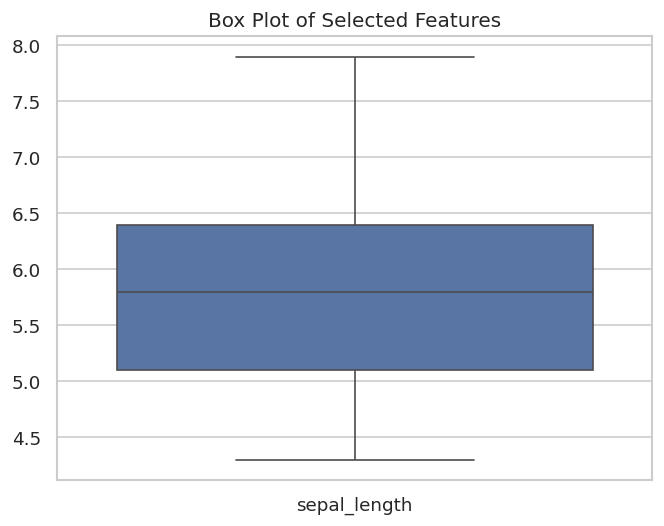

In [ ]:
# Box plots for selected features
sns.boxplot(data=data[['sepal_length']])
plt.title('Box Plot of Selected Features')
plt.show()

##Make your Histograms and Boxplots below this point

### Q1: Detailed Analysis
Provide a detailed analysis of each selected variable in this section.


###Example Write-Ups

* **Sepal length**

Distribution is roughly unimodal with moderate spread. By species, setosa skews smaller, virginica slightly larger, and versicolor sits between them with overlap. Boxplots show overlapping IQRs → sepal length alone is not strongly discriminative.

* **Sepal width**

Wider variance and less separation across species; setosa tends to have slightly higher medians but with considerable overlap. Expect this feature to have weak standalone predictive power.

* **Petal length (or petal width)**

Clear multi-modal structure across species. Setosa values are small and tightly clustered; versicolor and virginica occupy higher, largely non-overlapping ranges. This feature is highly informative for species classification.

##Actionable checklist for your write-ups

1. State the shape (uni/bimodal, skewed vs near-normal).

2. Quantify center/spread (mention median/IQR from boxplot).

3. Note outliers (count or presence; propose handling).

4. Compare groups (direction and size of median shifts; IQR overlap).

5. Processing decision (e.g., “log transform then StandardScaler” / “use RobustScaler” / “feature interacts with species”).

*Enter your write-up here*

## Feature Encoding
For this section, you will discuss and apply one-hot encoding vs. ordinal encoding. Identify which features should be encoded in which way.

**One Hot Encoder**

In [ ]:
# Version-safe OneHotEncoder with safe defaults
try:
    ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")  # sklearn >= 1.2
except TypeError:
    ohe = OneHotEncoder(sparse=False, handle_unknown="ignore")         # sklearn < 1.2

encoded = ohe.fit_transform(data[['species']])
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(['species']), index=data.index)
data_encoded = pd.concat([data.drop(columns=['species']), encoded_df], axis=1)


In [ ]:
encoded_df.head()

,species_setosa,species_versicolor,species_virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [ ]:
data_encoded.head()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0


**Ordinal Encoder**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import pandas as pd

# ----- Version-safe OrdinalEncoder with safe defaults -----
# Prefer: handle unknowns/missing with fixed codes so transforms won't break.
try:
    # sklearn ≥ 1.2 supports encoded_missing_value
    oe = OrdinalEncoder(
        handle_unknown="use_encoded_value",
        unknown_value=-1,               # code for unseen categories at transform
        encoded_missing_value=-2,       # code for NaN at fit/transform
        dtype=np.int64
    )
except TypeError:
    # sklearn 1.0–1.1 (no encoded_missing_value)
    try:
        oe = OrdinalEncoder(
            handle_unknown="use_encoded_value",
            unknown_value=-1
        )
    except TypeError:
        # very old sklearn: no handle_unknown; will raise on unseen cats
        oe = OrdinalEncoder()

# ----- Fit/transform just like your OneHotEncoder code -----
encoded = oe.fit_transform(data[['species']])

# Make a single ordinal column; use pandas nullable Int64 to be robust
encoded_series = pd.Series(
    encoded.ravel(),
    index=data.index,
    name='species_ord'
)

# If the encoder returned floats (older sklearn), coerce to nullable Int64 safely
encoded_series = encoded_series.astype('Int64', copy=False)

# Replace the original column with the ordinal codes
data_encoded2 = pd.concat([data.drop(columns=['species']), encoded_series], axis=1)


In [ ]:
data_encoded2.head()

,sepal_length,sepal_width,petal_length,petal_width,species_ord
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Play around with both of these encoders with your data and see what happens when you do these types of encoding.**

### Q2: Discuss where and why you would choose one-hot encoding in this dataset. Which variables should be one-hot and which should not?


*Enter your answer here*

###Talk about what happened

*Enter your answer here*

## Feature Transformation: Normalization & Standardization
Normalize the 'sepal_length' feature using Min-Max Scaling and Standard Scaling.





###Normalization vs. Standardization

* Normalization changes the **range** of data. Standardization changes the **shape** of the distribution of the data.

* **Normalization**  rescales values from [0,1]. This is useful when all parameters must have the same positive scale. **Standardization** rescales data so that the mean is always 0 and standard deviation  is always 1 (unit variance).

### **Normalization: Min-max scaling**

`scaler_min_max = MinMaxScaler()
data['sepal_length_normalized'] = scaler_min_max.fit_transform(data[['sepal_length']])`

Fits on sepal_length and creates a new column where every value is mapped to [0, 1] via

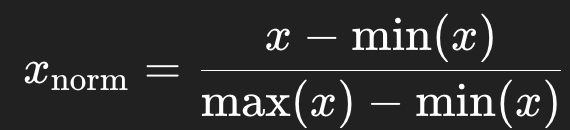


###**Normalization: Standardization (Z-score)**

`scaler_standard = StandardScaler()
data['sepal_length_standardized'] = scaler_standard.fit_transform(data[['sepal_length']])`

Fits on `sepal_length` and creates a new column where values have mean ≈ 0 and std ≈ 1 via

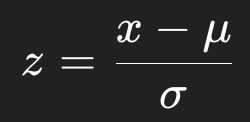



In [ ]:
# assumes `data` exists from the previous step (with 'sepal_length' column)
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df = data.copy()  # safe copy

# Min–Max (0–1)
scaler_min_max = MinMaxScaler()
df['sepal_length_minmax'] = scaler_min_max.fit_transform(df[['sepal_length']]).ravel()



In [ ]:
# Z-score (mean=0, std=1)
scaler_standard = StandardScaler()
df['sepal_length_z'] = scaler_standard.fit_transform(df[['sepal_length']]).ravel()

print("Min–Max and Z-score (first 5 rows):")
print(df[['sepal_length', 'sepal_length_minmax', 'sepal_length_z']].head())

Min–Max and Z-score (first 5 rows):
   sepal_length  sepal_length_minmax  sepal_length_z
0           5.1             0.222222       -0.900681
1           4.9             0.166667       -1.143017
2           4.7             0.111111       -1.385353
3           4.6             0.083333       -1.506521
4           5.0             0.194444       -1.021849


In [ ]:
scaled_z = data_encoded.copy()
scaled_z[cont_cols] = StandardScaler().fit_transform(scaled_z[cont_cols])

print(scaled_z.head())

   sepal_length  sepal_width  petal_length  petal_width  species_setosa  \
0     -0.900681     1.019004     -1.340227    -1.315444             1.0   
1     -1.143017    -0.131979     -1.340227    -1.315444             1.0   
2     -1.385353     0.328414     -1.397064    -1.315444             1.0   
3     -1.506521     0.098217     -1.283389    -1.315444             1.0   
4     -1.021849     1.249201     -1.340227    -1.315444             1.0   

   species_versicolor  species_virginica  
0                 0.0                0.0  
1                 0.0                0.0  
2                 0.0                0.0  
3                 0.0                0.0  
4                 0.0                0.0  


###Why it matters

* Many models assume features are on comparable scales. Scaling stabilizes training and makes distances/gradients meaningful.

* Min-Max preserves the shape of the distribution (just rescales the range).

* Standardization recenters/rescales and is often the better default for linear models.

###(Optional) Sanity Checks

* Print the minimum and maximum of the Min-Max-scaled column.

* If you fit/transform on the same data, you should see 0.0 and 1.0 (up to tiny rounding error).

* If you fit on a train split and print on the full dataset, some values (e.g., in test) can be outside [0, 1]— that's normal.

### Code for normalization and standardization

In [ ]:
# Normalization using Min-Max Scaling
scaler_min_max = MinMaxScaler()
data['sepal_length_normalized'] = scaler_min_max.fit_transform(data[['sepal_length']])
print("Min-Max Normalized:")
print(data[['sepal_length', 'sepal_length_normalized']].head())

# Standardization using Standard Scaler
scaler_standard = StandardScaler()
data['sepal_length_standardized'] = scaler_standard.fit_transform(data[['sepal_length']])
print("Standard Normalized:")
print(data[['sepal_length', 'sepal_length_standardized']].head())

Min-Max Normalized:
   sepal_length  sepal_length_normalized
0           5.1                 0.222222
1           4.9                 0.166667
2           4.7                 0.111111
3           4.6                 0.083333
4           5.0                 0.194444
Standard Normalized:
   sepal_length  sepal_length_standardized
0           5.1                  -0.900681
1           4.9                  -1.143017
2           4.7                  -1.385353
3           4.6                  -1.506521
4           5.0                  -1.021849


**Print the results**

In [ ]:
print(data['sepal_length_normalized'].min(), data['sepal_length_normalized'].max())  # expect 0.0 1.0



0.0 1.0


In [ ]:
print(data['sepal_length_standardized'].mean(), data['sepal_length_standardized'].std())  # ~0.0 ~1.0

-4.736951571734001e-16 1.0033500931359767


###How to interpret
In the Normalized (Min-Max) output, each number tells you where that sample sits between the global min and max of sepal length:

* 0.00 means “at the minimum sepal length in the dataset,”

* 1.00 means “at the maximum,”

* 0.50 is halfway between min and max, etc.

In the Standardized (Z-score) output, each number is a z-score:

* 0 = exactly the mean,

* +1.0 = one standard deviation above the mean,

* -1.0 = one standard deviation below the mean, etc.

* Magnitude shows how unusual the value is relative to typical variation.

###Play around with normalization and standardization on different features

###Q3: Talk about which features need to be standardized and which features need to be normalized. Interpret the results of your analysis here.

*Enter your answer here*

## Correlation Analysis
###**Study the correlation of each feature using pair plots**



###How to read a pairplot (step-by-step)

1. **Diagonal (univariate):**

    * Each diagonal cell is a histogram of one feature → check shape (skewed? multimodal?), center (median/mean region), spread, and outliers.

    * Processing hints: strong right-skew → consider log; heavy tails → robust scalers (remember the link from class Module 2 slide 8).

2. **Off-diagonals (bivariate scatter):**

    * **Direction:** upward trend = positive correlation; downward = negative.

    * **Strength/linearity:** tight, straight ellipse = strong linear; curved or “banana” = non-linear (consider polynomial features or tree models).

    * **Spread/heteroscedasticity:** fan-shapes mean variance changes with x → linear models may struggle.

    * **Outliers/clusters:** isolated points or multiple clouds → subgroups, mislabeled data, or class structure.

3. **Hue (class/color) interpretation (if you set hue=):**

    * **Class separability:** Are color clusters separated? If yes, that pair is discriminative.

    * **Discriminative** = maximizes between-class separation while minimizing within-class spread.

    * **Overlap:** Heavy overlap → weaker standalone predictive power.

    * **Interactions:** A feature pair can separate classes even if each feature alone doesn't.

4. **Use the axes:**

    * Always read the axis labels/units—apparent patterns can be scale artifacts.

    * Compare like with like (e.g., density not counts when group sizes differ).



### Why pairplots matter in exploration and processing

* **Feature selection:** Highly collinear features (e.g., nearly a line) can be redundant — drop one.

* **Model choice:** Linear, tight trends favor linear models; curved/separable blobs suggest trees/kernels or engineered features.

* **Preprocessing decisions:** Skew/outliers spotted on the diagonal suggest transforms or robust scaling.

* **Class insights:** With hue, you can see which pairs offer the cleanest separation (great for your write-up).






###Write-up examples (what to say in your report)

* **Petal length vs Petal width:** Strong positive linear relationship; with `hue='species'`, setosa is fully separated; versicolor vs virginica show partial overlap → highly informative pair.

* **Sepal length vs Petal length:** Positive trend and decent separation between species → useful feature combo.

* **Sepal width vs Sepal length:** Weak/near-zero correlation; heavy overlap by species → less discriminative.



###Checklist for Write-up

 1. **Setup:** State data (n=150), features (4), hue='species', any plot options.

 2. **Diagonal:** Note shape (skew/normal), spread, and any outliers per feature.

 6. **Separability:** Which species separate cleanly and which overlap?

 7. **Preprocessing:** Any transforms (for skew/outliers) and need for scaling; note high collinearity of petal features.

 8. **Modeling Takeaway** How would this best be modeled? Linearly or nonlinearly?

###Make the pairplot

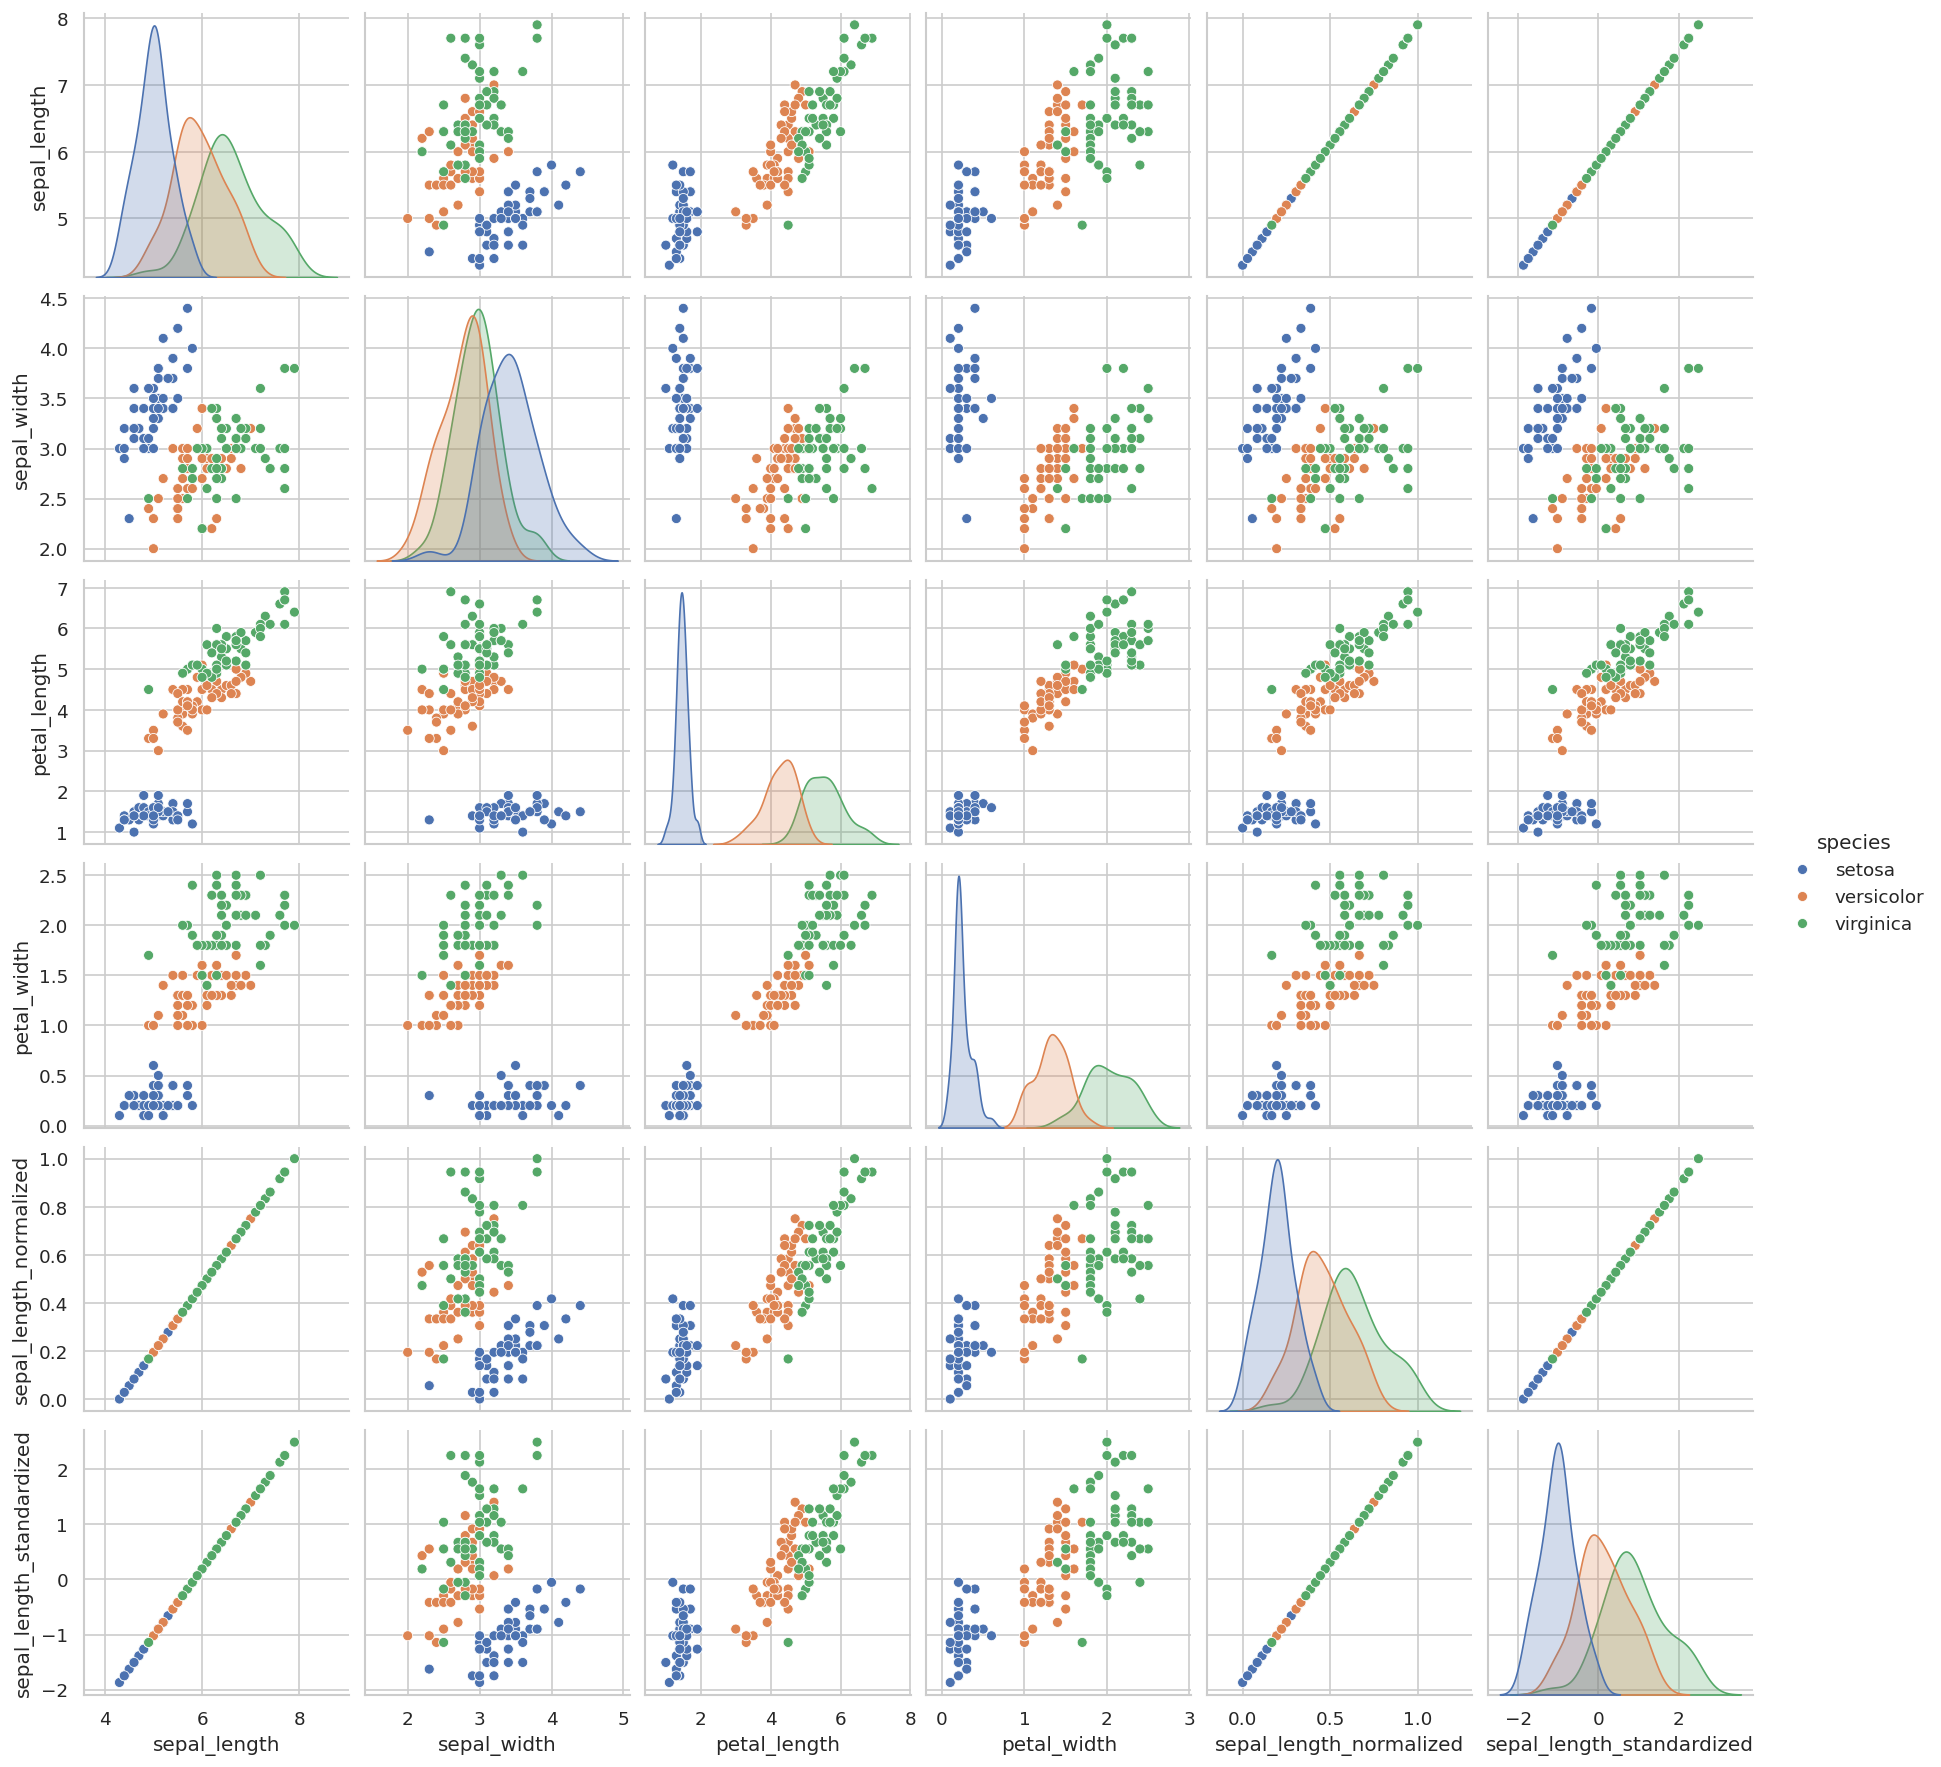

In [ ]:
# Pair plot for correlation analysis
sns.pairplot(data, hue='species')
plt.show()

###Q4: Select at least 3 plots from the pair plot analysis and explain why they are of interest.

*Type your answer here*

##Q5: Handling Special Cases in Data
Discuss handling something like zip code as a categorical or numerical feature.

*Enter your answer here*

## Reflection
Reflect on the learning from this project, challenges faced, and insights gained.

* Write a reflection on what you have learned from this project.
* Discuss at least 3 new insights or techniques you encountered and outline any challenges you still face.

*Enter your answer here*